In [ ]:
!pip install u8darts[all] --quiet


In [ ]:
# 1. 날짜 + 시간 → 세로형 변환
df_long = df.melt(id_vars='날짜', var_name='시간', value_name='수요량(MWh)')
df_long['시간'] = df_long['시간'].str.replace('시', '').astype(int)

# 2. 날짜 + 시간 합쳐서 datetime 생성
df_long['일시'] = pd.to_datetime(df_long['날짜']) + pd.to_timedelta(df_long['시간'] - 1, unit='h')

# 3. Prophet용 포맷으로 변환
df_prophet = df_long[['일시', '수요량(MWh)']].rename(columns={'일시': 'ds', '수요량(MWh)': 'y'})


In [ ]:
!pip install lightgbm matplotlib pandas seaborn statsmodels --quiet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# -- 2. 데이터 불러오기 및 전처리 (long 변환) --
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/한국전력거래소_시간별 전국 전력수요량_20241231.csv", encoding='cp949')
df_long = df.melt(id_vars='날짜', var_name='시간', value_name='수요량(MWh)')
df_long['시간_num'] = df_long['시간'].str.replace('시', '').astype(int)
df_long['일시'] = pd.to_datetime(df_long['날짜']) + pd.to_timedelta(df_long['시간_num'] % 24, unit='h')
df_long.loc[df_long['시간_num'] == 24, '일시'] += pd.Timedelta(days=1)
df_long = df_long[['일시', '수요량(MWh)']].sort_values('일시')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

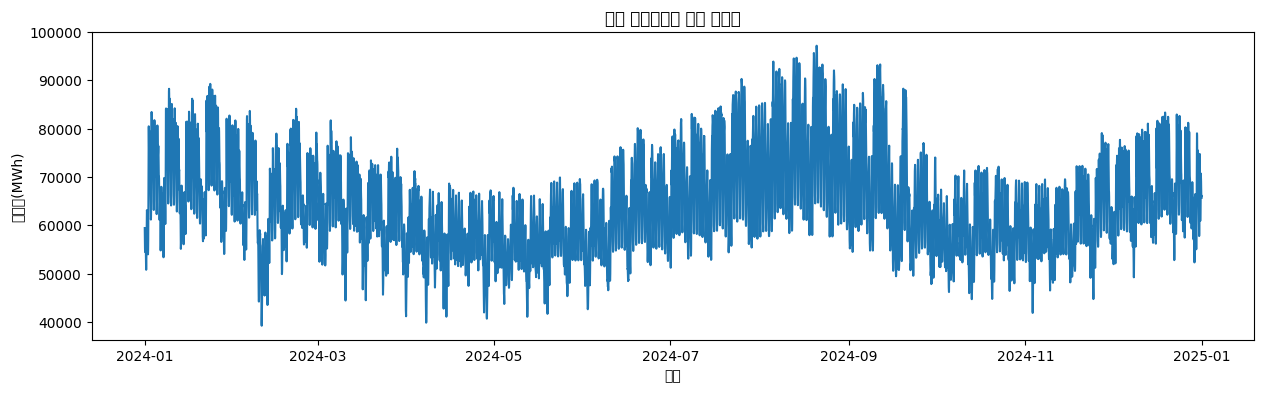

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

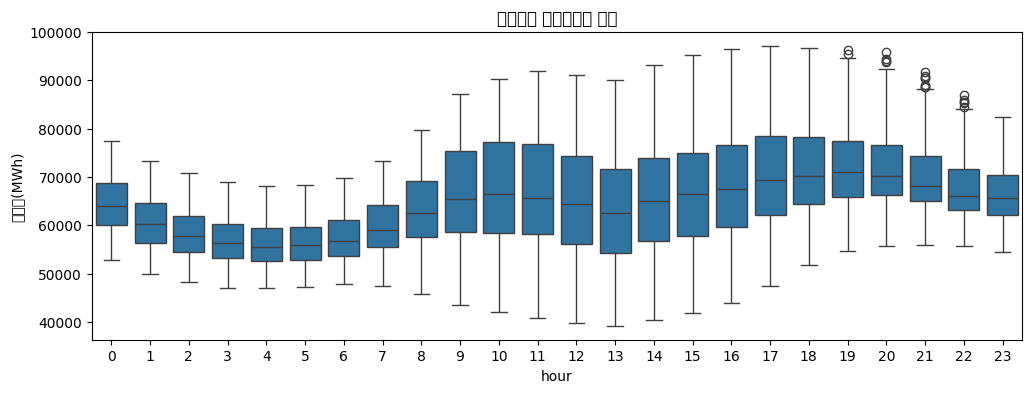

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

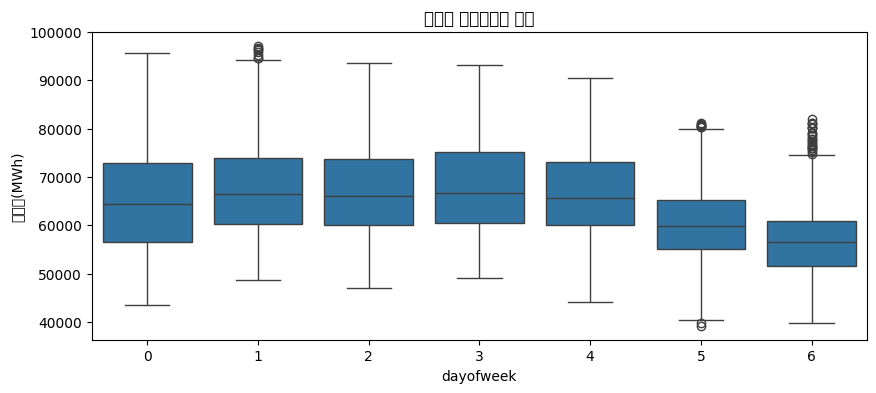

In [ ]:
# -- 3. 데이터 EDA 및 시각화 --
import matplotlib.pyplot as plt

df_long['hour'] = df_long['일시'].dt.hour
df_long['dayofweek'] = df_long['일시'].dt.dayofweek
df_long['month'] = df_long['일시'].dt.month

plt.figure(figsize=(15,4))
plt.plot(df_long['일시'], df_long['수요량(MWh)'])
plt.title('전국 전력수요량 전체 시계열')
plt.xlabel('일시')
plt.ylabel('수요량(MWh)')
plt.show()

import seaborn as sns
plt.figure(figsize=(12,4))
sns.boxplot(x='hour', y='수요량(MWh)', data=df_long)
plt.title('시간대별 전력수요량 분포')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='dayofweek', y='수요량(MWh)', data=df_long)
plt.title('요일별 전력수요량 분포')
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA MAE: 6743.72, RMSE: 8372.74


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

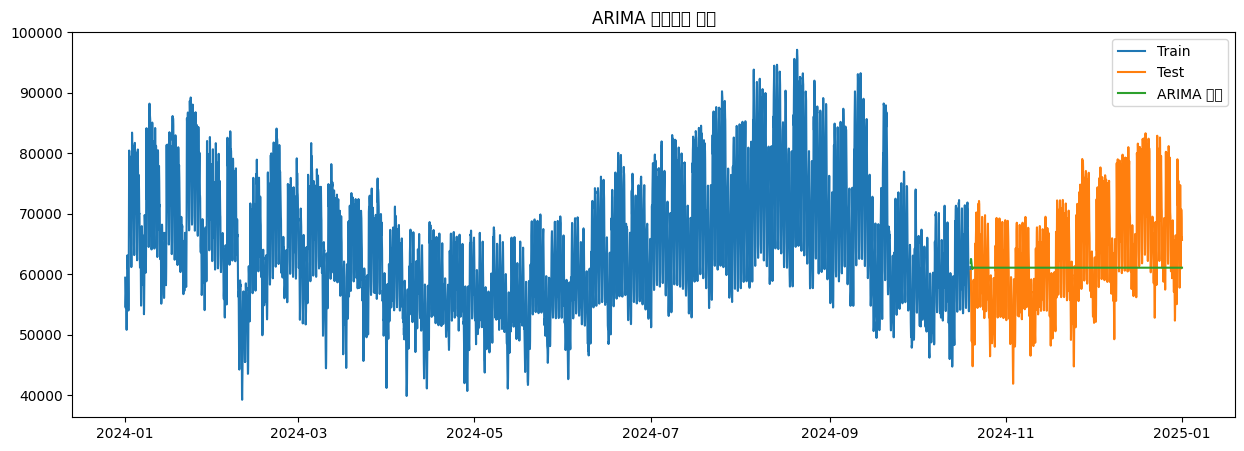

In [ ]:
# 3. 시계열 모델 적용 및 성능 비교
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np  # 추가

# -- ARIMA 예측 (단변량) --
df_long2 = df_long.set_index('일시')
split_idx = int(len(df_long2)*0.8)
train, test = df_long2.iloc[:split_idx], df_long2.iloc[split_idx:]

model = ARIMA(train['수요량(MWh)'], order=(3,1,2))
model_fit = model.fit()
pred_arima = model_fit.forecast(steps=len(test))

mae_arima = mean_absolute_error(test['수요량(MWh)'], pred_arima)
rmse_arima = np.sqrt(mean_squared_error(test['수요량(MWh)'], pred_arima))  # ← 수정!
print(f"ARIMA MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")

plt.figure(figsize=(15,5))
plt.plot(train.index, train['수요량(MWh)'], label='Train')
plt.plot(test.index, test['수요량(MWh)'], label='Test')
plt.plot(test.index, pred_arima, label='ARIMA 예측')
plt.legend()
plt.title('ARIMA 전력수요 예측')
plt.show()


In [ ]:
!pip install u8darts[all] --quiet


In [ ]:
from darts import TimeSeries

series = TimeSeries.from_dataframe(df_long, time_col='일시', value_cols='수요량(MWh)')


In [ ]:
#시계열 정규화
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler

scaler = Scaler(StandardScaler())
series_scaled = scaler.fit_transform(series)


In [ ]:
#모델 선택
from darts.models import DLinearModel, NLinearModel

model = DLinearModel(input_chunk_length=168, output_chunk_length=24)
# model = NLinearModel(input_chunk_length=168, output_chunk_length=24)


In [ ]:
#학습 및 예측
model.fit(series_scaled[:-24])  # 마지막 하루 빼고 학습
forecast = model.predict(24)
forecast = scaler.inverse_transform(forecast)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 4.1 K  | train
7 | linear_trend    | Linear           | 4.1 K  | train
-------------------------------------------------------------
8.1 K     Trainable params
0         Non-trainable params
8.1 K     Total params
0.0

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='일시'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missin

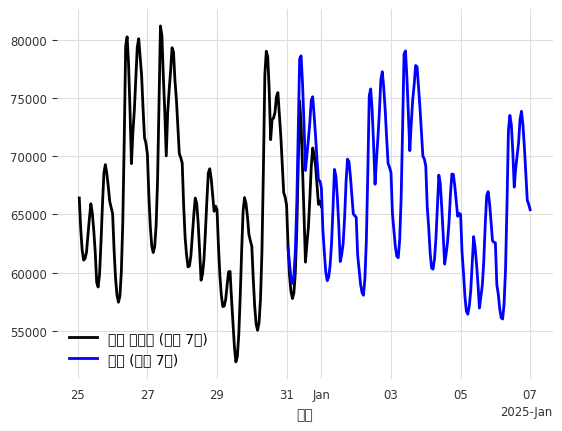

In [ ]:
# 7일 예측
forecast = model.predict(168)
forecast = scaler.inverse_transform(forecast)

# 입력 구간도 7일
input_series = scaler.inverse_transform(series_scaled[-168:])

# 시각화
input_series.plot(label="입력 데이터 (최근 7일)", color="black")
forecast.plot(label="예측 (다음 7일)", color="blue")


In [ ]:
#NLinear 예측 (7일)
from darts.models import NLinearModel
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler

# 1. 스케일링 (이전과 동일)
scaler = Scaler(StandardScaler())
series_scaled = scaler.fit_transform(series)

# 2. NLinear 모델 정의 (최근 7일 → 다음 7일 예측)
n_model = NLinearModel(input_chunk_length=168, output_chunk_length=168)

# 3. 학습 (마지막 7일은 예측용으로 제외)
n_model.fit(series_scaled[:-168])

# 4. 예측
forecast_n = n_model.predict(168)
forecast_n = scaler.inverse_transform(forecast_n)

# 5. 입력 시계열 복원
input_series = scaler.inverse_transform(series_scaled[-168:])


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | layer           | Linear           | 28.4 K | train
-------------------------------------------------------------
28.4 K    Trainable params
0         Non-trainable params
28.4 K    Total params
0.114     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='일시'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missin

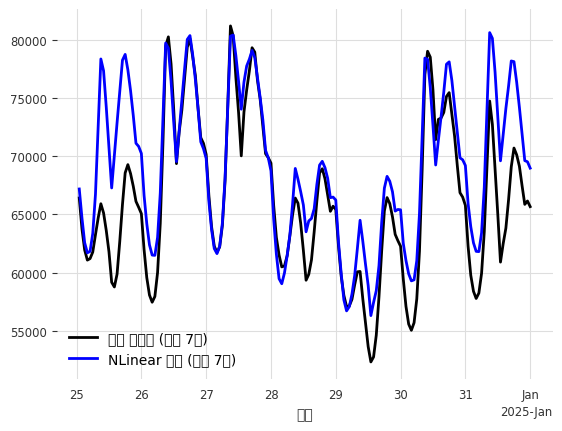

In [ ]:
input_series.plot(label="입력 데이터 (최근 7일)", color='black')
forecast_n.plot(label="NLinear 예측 (다음 7일)", color='blue')


검정선 : 실제 데이터
파란선 : 다음 7일 예측한 데이터

In [ ]:
# 최근 7일만 따로 잘라서
history = series_scaled[-168:]

# 이 구간을 기준으로 예측 시작
forecast_n = n_model.predict(n=168, series=history)
forecast_n = scaler.inverse_transform(forecast_n)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
input_series = scaler.inverse_transform(history)

input_series.plot(label="입력 데이터 (최근 7일)", lw=2, color="black")
forecast_n.plot(label="NLinear 예측 (다음 7일)", lw=2, color="blue")

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


NameError: name 'scaler' is not defined

In [ ]:
#DLinear 모델 예측 코드
from darts.models import DLinearModel

# DLinear 모델 정의 (입력 7일 → 예측 7일)
d_model = DLinearModel(input_chunk_length=168, output_chunk_length=168)

# 학습 (최근 7일 제외한 전체로 학습)
d_model.fit(series_scaled[:-168])

# 예측 (입력 시점 명시)
forecast_d = d_model.predict(168, series=series_scaled[-168:])
forecast_d = scaler.inverse_transform(forecast_d)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 28.4 K | train
7 | linear_trend    | Linear           | 28.4 K | train
-------------------------------------------------------------
56.8 K    Trainable params
0         Non-trainable params
56.8 K    Total params
0.2

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
#입력데이터 (최근 7일) 복원
input_series = scaler.inverse_transform(series_scaled[-168:])


<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

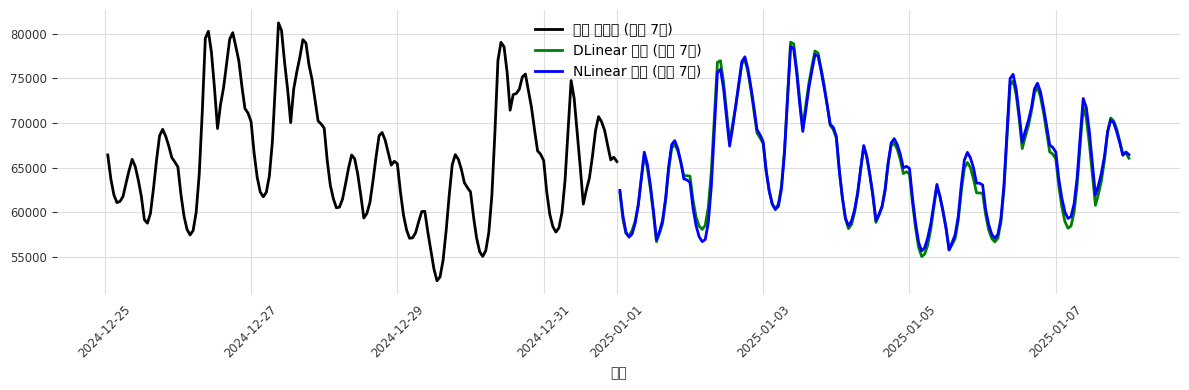

In [ ]:
#DLinear vs NLinear 비교
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 4))

# 입력 시계열
input_series.plot(label="입력 데이터 (최근 7일)", color="black")

# DLinear 예측
forecast_d.plot(label="DLinear 예측 (다음 7일)", color="green")

# NLinear 예측 (앞에서 만든 forecast_n 사용)
forecast_n.plot(label="NLinear 예측 (다음 7일)", color="blue")

# 날짜 포맷 + 스타일
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# NLinear 모델 적용
H = 24 * 90  # 90일 = 3개월 = 2160시간

# 최근 90일(2160시간) 중 일부 구간을 history로 설정 (예: 마지막 1개월만 써도 OK)
history = series_scaled[-2160:]

# 예측
forecast_n = n_model.predict(H, series=history)
forecast_n = scaler.inverse_transform(forecast_n)

# 입력 복원
input_series = scaler.inverse_transform(history)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inpu

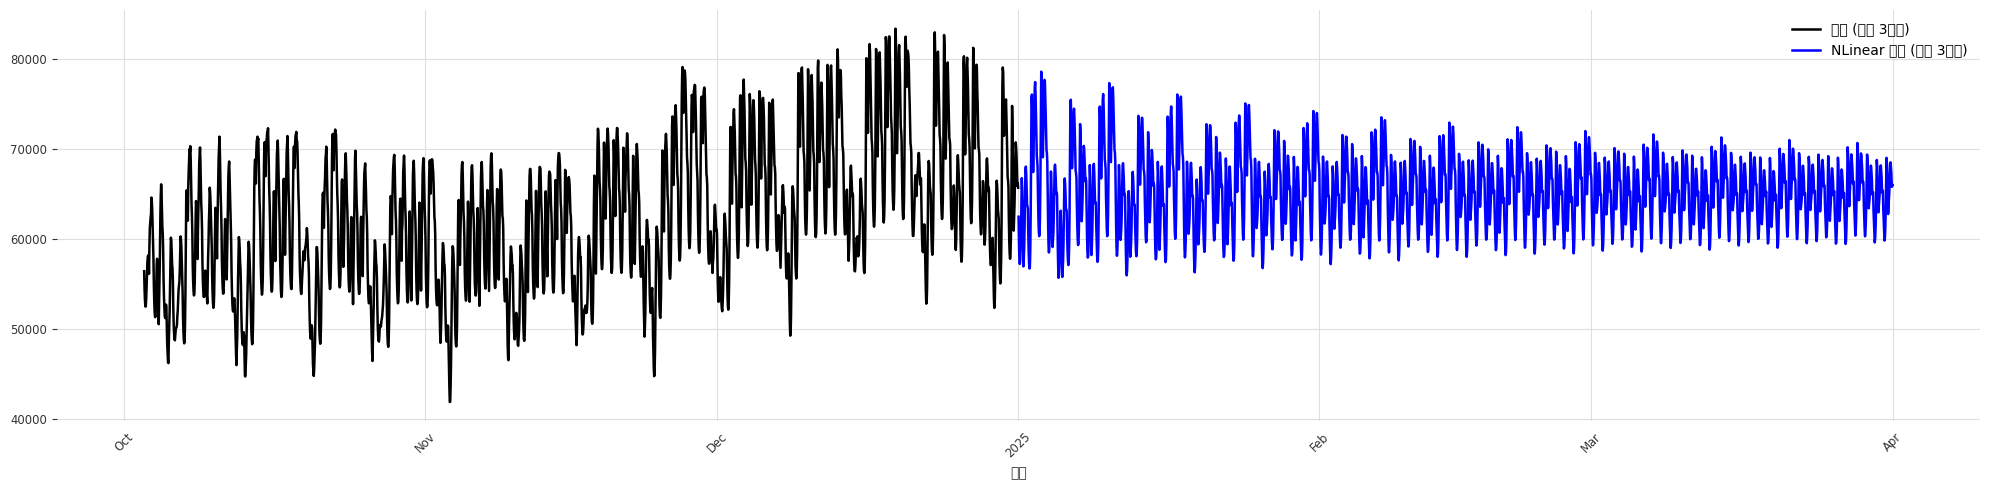

In [ ]:
#계절 단위 예측 시각화
plt.figure(figsize=(20, 5))
input_series.plot(label="입력 (최근 3개월)", lw=1.8, color='black')
forecast_n.plot(label="NLinear 예측 (다음 3개월)", lw=1.8, color='blue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from darts.models import DLinearModel

H = 24 * 90  # 90일 = 2160시간

# 최근 90일 데이터 (NLinear와 동일)
history = series_scaled[-2160:]

# DLinear 모델 정의
d_model = DLinearModel(input_chunk_length=2160, output_chunk_length=2160)

# 학습 (예측용 구간 제외)
d_model.fit(series_scaled[:-2160])

# 예측
forecast_d = d_model.predict(n=2160, series=history)
forecast_d = scaler.inverse_transform(forecast_d)

# 입력 데이터 복원
input_series = scaler.inverse_transform(history)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 4.7 M  | train
7 | linear_trend    | Linear           | 4.7 M  | train
-------------------------------------------------------------
9.3 M     Trainable params
0         Non-trainable params
9.3 M     Total params
37.

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

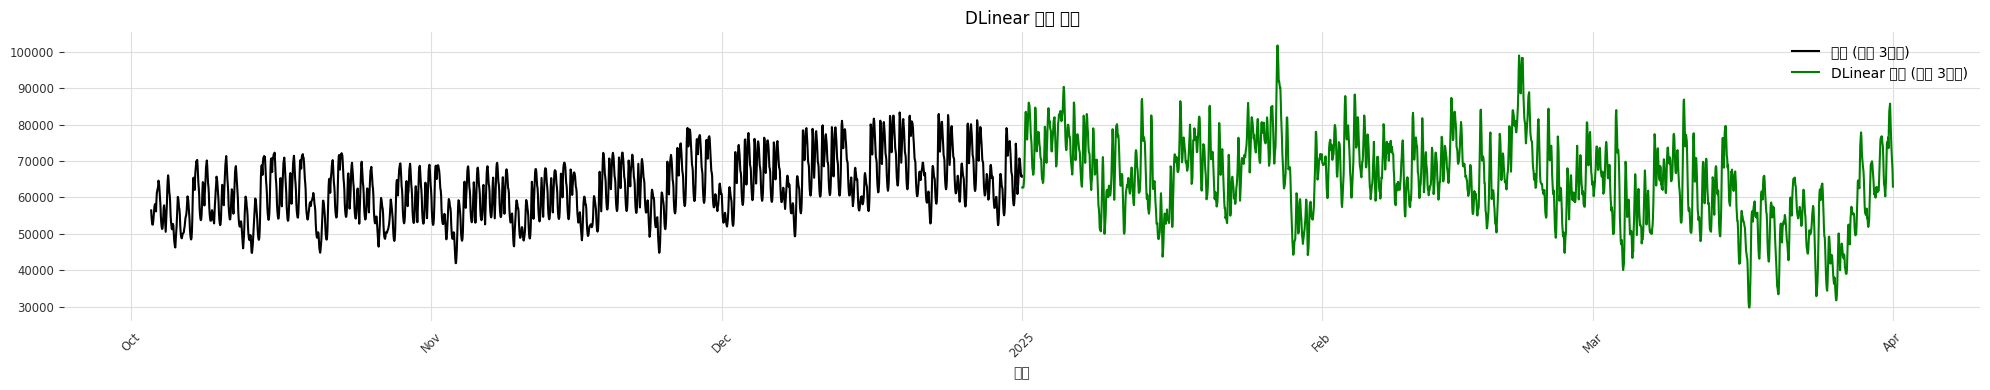

In [ ]:
#DLinear 모델 시각화
plt.figure(figsize=(20, 4))
input_series.plot(label="입력 (최근 3개월)", lw=1.5, color="black")
forecast_d.plot(label="DLinear 예측 (다음 3개월)", lw=1.5, color="green")

plt.title("DLinear 모델 예측")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

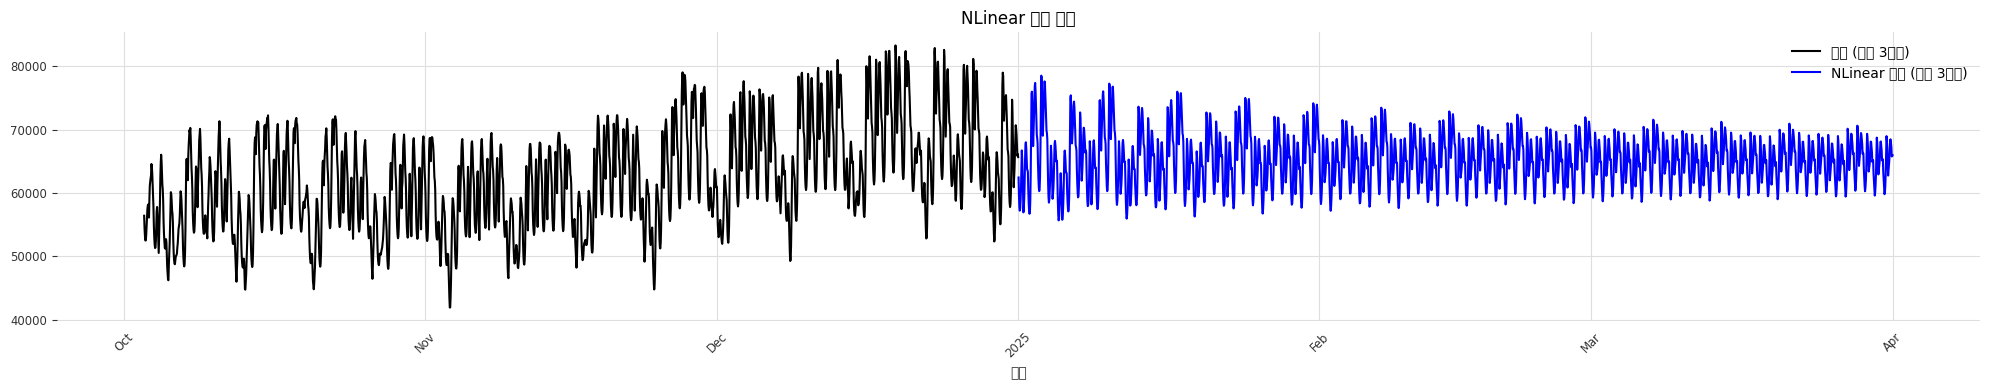

In [ ]:
#NLinear 모델 시각화
plt.figure(figsize=(20, 4))
input_series.plot(label="입력 (최근 3개월)", lw=1.5, color="black")
forecast_n.plot(label="NLinear 예측 (다음 3개월)", lw=1.5, color="blue")

plt.title("NLinear 모델 예측")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipytho

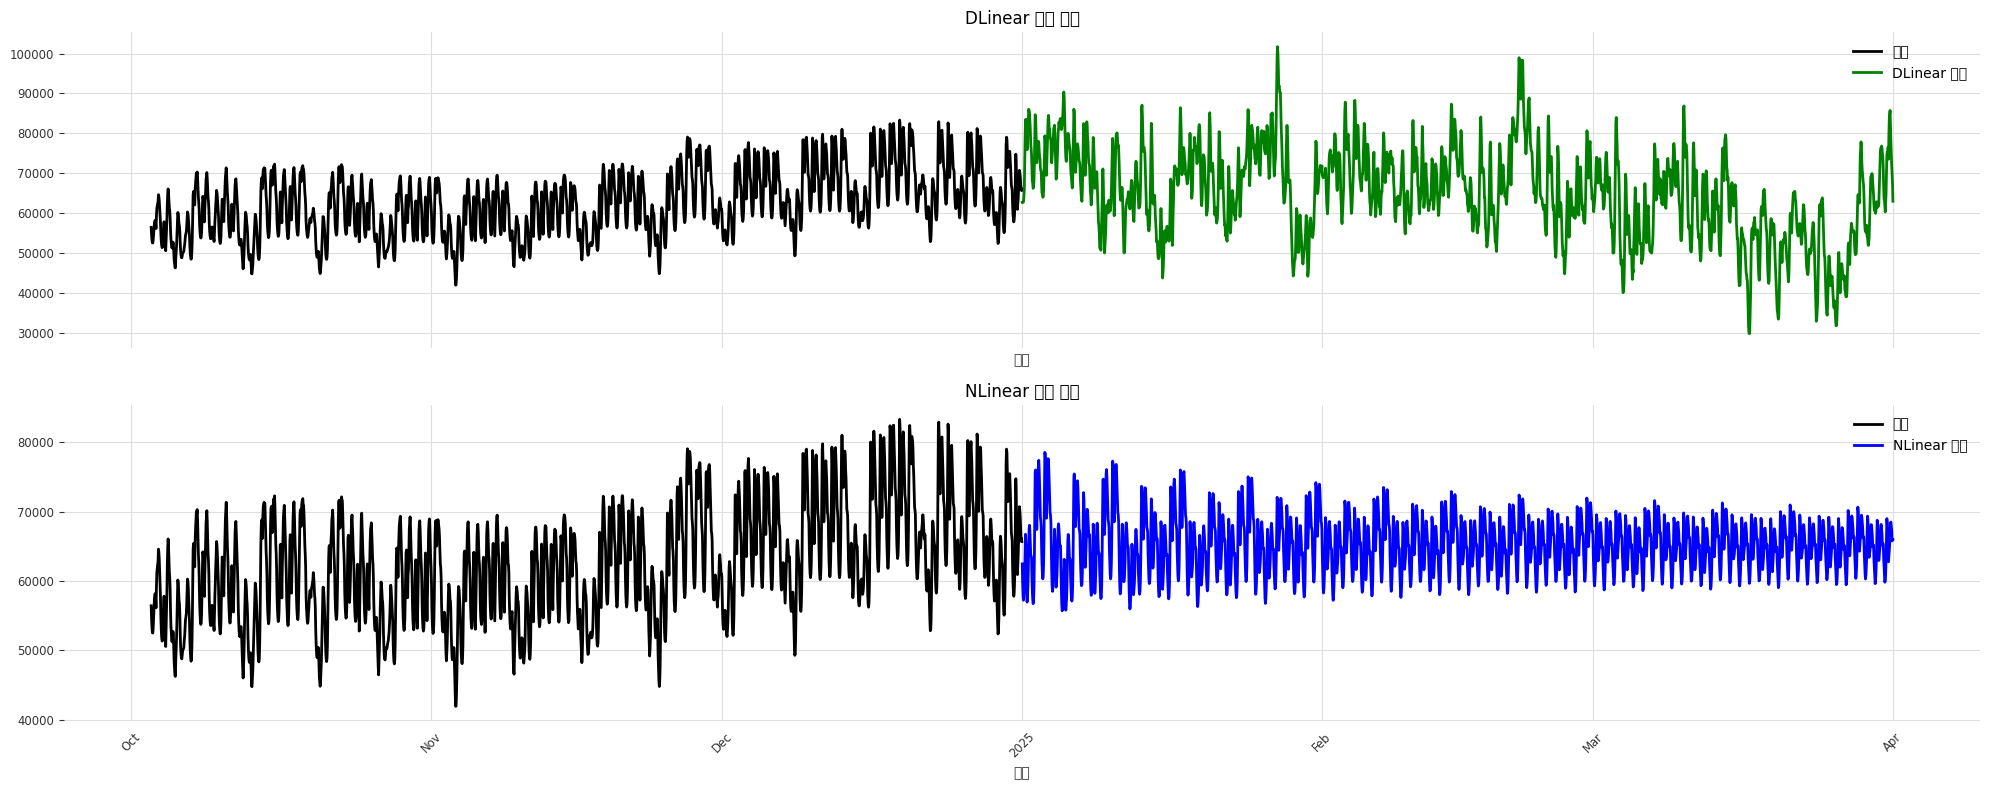

In [ ]:
#DLinear NLinear 한 박스에 비교
fig, axes = plt.subplots(2, 1, figsize=(20, 8), sharex=True)

# DLinear
input_series.plot(ax=axes[0], label="입력", color='black')
forecast_d.plot(ax=axes[0], label="DLinear 예측", color='green')
axes[0].set_title("DLinear 예측 결과")
axes[0].legend()
axes[0].grid(True)

# NLinear
input_series.plot(ax=axes[1], label="입력", color='black')
forecast_n.plot(ax=axes[1], label="NLinear 예측", color='blue')
axes[1].set_title("NLinear 예측 결과")
axes[1].legend()
axes[1].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

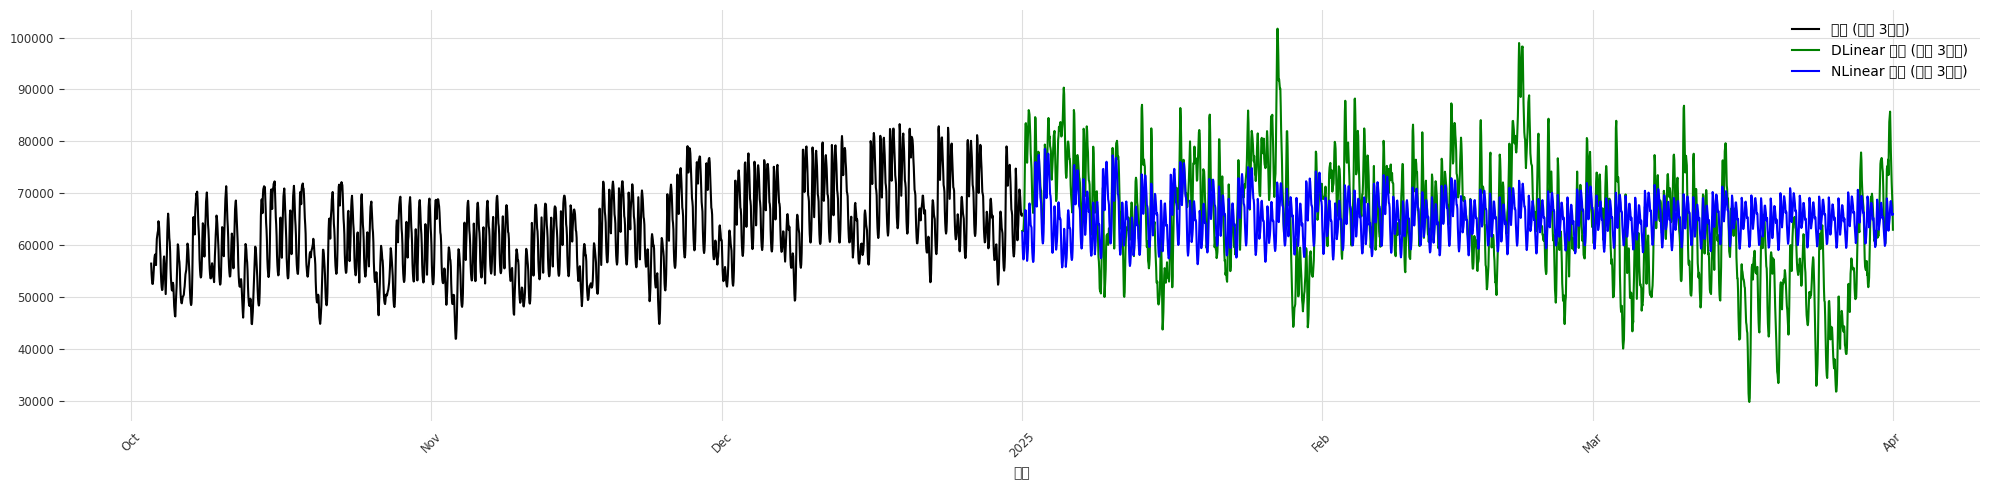

In [ ]:
#DLinear vs NLinear 모델 비교
plt.figure(figsize=(20, 5))

# 입력 시계열
input_series.plot(label="입력 (최근 3개월)", lw=1.5, color='black')

# DLinear 예측
forecast_d.plot(label="DLinear 예측 (다음 3개월)", lw=1.5, color='green')

# NLinear 예측 (이전 forecast_n 그대로 사용)
forecast_n.plot(label="NLinear 예측 (다음 3개월)", lw=1.5, color='blue')

plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

forecast_d = forecast_d.map(lambda x: np.clip(x, 40000, 90000))


In [ ]:
d_model = DLinearModel(input_chunk_length=720, output_chunk_length=2160)  # 30일 → 90일 예측


In [ ]:
forecast_d = forecast_d * 0.85  # 전체 예측값 15% 감소


In [ ]:
#DLinear 안정화
import pandas as pd
from darts import TimeSeries

# 1. TimeSeries → pandas DataFrame 수동 변환
df = pd.DataFrame({
    "value": forecast_d.values().flatten(),
}, index=forecast_d.time_index)

# 2. 이동평균 스무딩
smoothed = df.rolling(window=24, min_periods=1).mean()

# 3. 다시 TimeSeries로 변환
forecast_d_smooth = TimeSeries.from_dataframe(smoothed)


<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

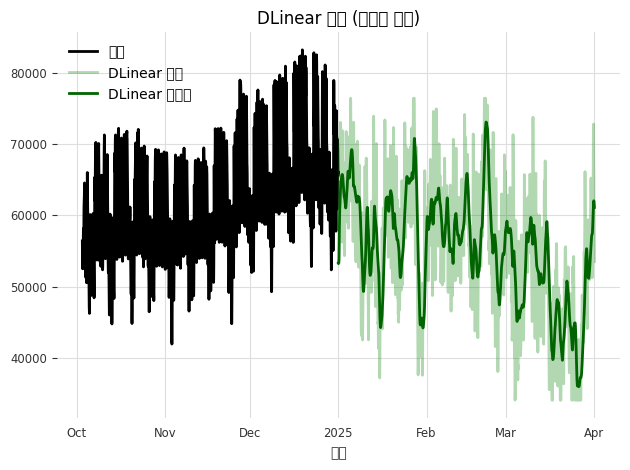

In [ ]:
#DLinear 안정화 시각화
input_series.plot(label="입력", color='black')
forecast_d.plot(label="DLinear 원본", color='green', alpha=0.3)
forecast_d_smooth.plot(label="DLinear 스무딩", color='darkgreen', lw=2)

plt.title("DLinear 예측 (스무딩 적용)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython

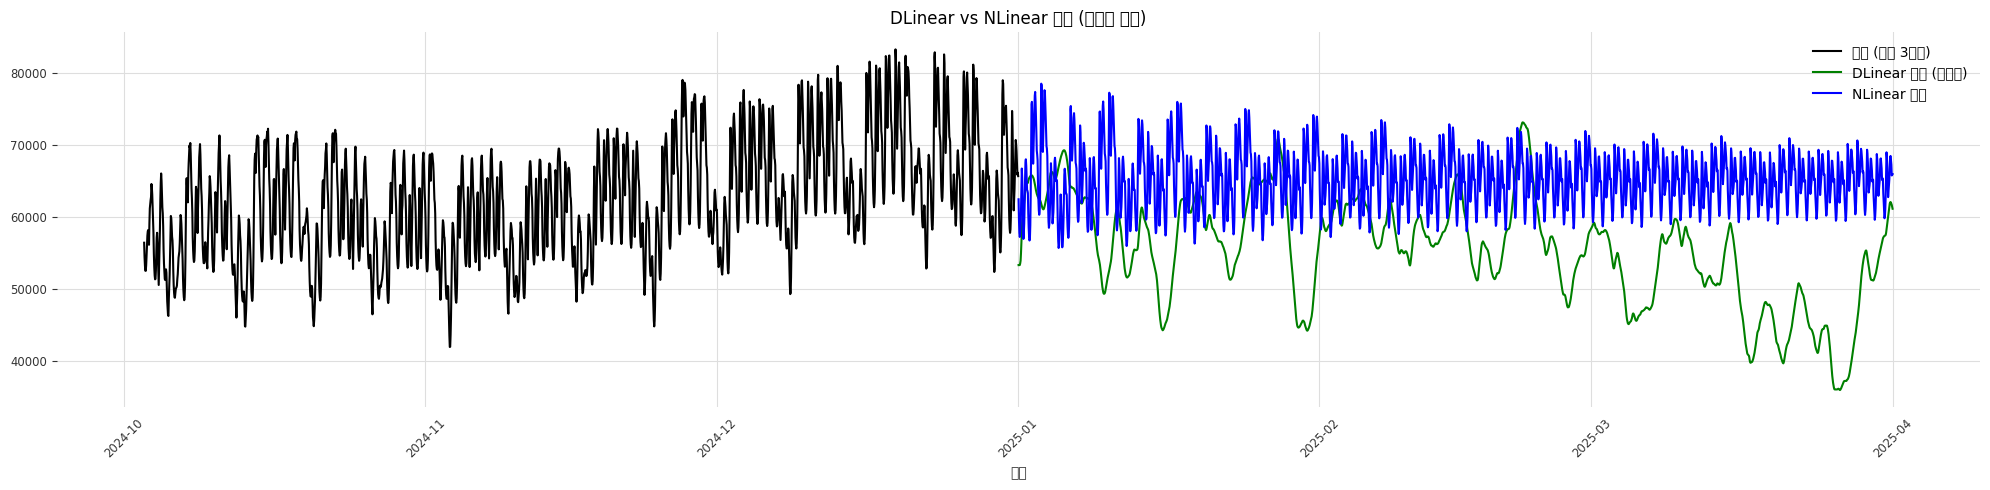

In [ ]:
#수정한 DLinear 와 NLinear비교
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(20, 5))

# 입력 시계열
input_series.plot(label="입력 (최근 3개월)", lw=1.5, color='black')

# 스무딩된 DLinear 예측
forecast_d_smooth.plot(label="DLinear 예측 (스무딩)", lw=1.5, color='green')

# 기존 NLinear 예측
forecast_n.plot(label="NLinear 예측", lw=1.5, color='blue')

# 시각 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title("DLinear vs NLinear 예측 (스무딩 적용)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 예측 데이터 분기별로 나누기
# 1. pandas DataFrame으로 변환
df = pd.DataFrame({
    "value": forecast_d_smooth.values().flatten(),
}, index=forecast_d_smooth.time_index)

# 2. 분기 정보 추가
df["quarter"] = df.index.to_period("Q")

# 3. 분기별 평균값 구하기
quarterly_avg = df.groupby("quarter")["value"].mean()

print(quarterly_avg)


quarter
2025Q1    55334.024949
2025Q2    61135.653158
Freq: Q-DEC, Name: value, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

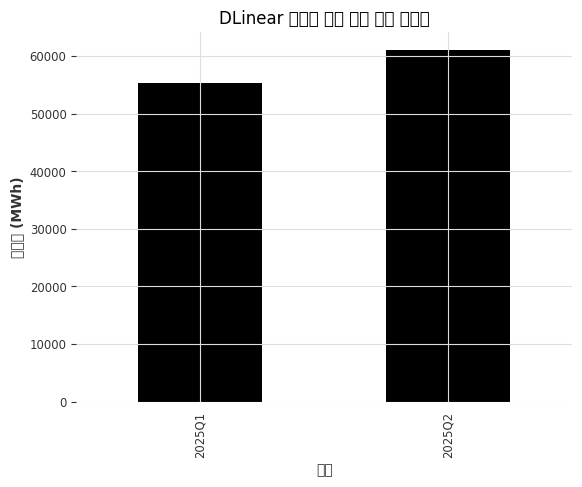

In [ ]:
quarterly_avg.plot(kind='bar', title="DLinear 분기별 예측 평균 전력 수요량")
plt.ylabel("수요량 (MWh)")
plt.xlabel("분기")
plt.grid(True)
plt.show()


In [ ]:
'/content/한국전력거래소_시간별 전국 전력수요량_20241231.csv'


'/content/한국전력거래소_시간별 전국 전력수요량_20241231.csv'

In [ ]:
!pip install u8darts[all] --quiet

import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import DLinearModel
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. 데이터 로딩 및 정리
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/한국전력거래소_시간별 전국 전력수요량_20241231.csv", encoding='cp949')
df_long = df.melt(id_vars='날짜', var_name='시간', value_name='수요량')
df_long['시간'] = df_long['시간'].str.replace('시', '').astype(int)
df_long['일시'] = pd.to_datetime(df_long['날짜']) + pd.to_timedelta(df_long['시간'] - 1, unit='h')
df_long = df_long[['일시', '수요량']].sort_values('일시')

# 2. TimeSeries 변환 및 스케일링
series = TimeSeries.from_dataframe(df_long, time_col='일시', value_cols='수요량')
scaler = Scaler(StandardScaler())
series_scaled = scaler.fit_transform(series)

# 3. DLinear 예측
input_chunk = 2160
output_chunk = 2160
history = series_scaled[-input_chunk:]

model = DLinearModel(input_chunk_length=input_chunk, output_chunk_length=output_chunk)
model.fit(series_scaled[:-input_chunk])
forecast_d = model.predict(n=output_chunk, series=history)

# 4. 스무딩 처리
df_forecast = pd.DataFrame({"value": forecast_d.values().flatten()}, index=forecast_d.time_index)
df_forecast["smoothed"] = df_forecast["value"].rolling(window=6, min_periods=1).mean()
forecast_d_smooth = TimeSeries.from_dataframe(df_forecast[["smoothed"]])

# 5. 입력 시계열 복원
input_series = scaler.inverse_transform(history)

# 6. 분기별 평균 비교
df_input = pd.DataFrame({"value": input_series.values().flatten()}, index=input_series.time_index)
df_forecast = pd.DataFrame({"value": forecast_d_smooth.values().flatten()}, index=forecast_d_smooth.time_index)
df_input["quarter"] = df_input.index.to_period("Q")
df_forecast["quarter"] = df_forecast.index.to_period("Q")

q_avg_input = df_input.groupby("quarter")["value"].mean()
q_avg_forecast = df_forecast.groupby("quarter")["value"].mean()

df_compare = pd.DataFrame({
    "2024 실제값": q_avg_input,
    "2025 예측값 (DLinear)": q_avg_forecast
}).sort_index()

# 결과 출력
print(df_compare)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 4.7 M  | train
7 | linear_trend    | Linear           | 4.7 M  | train
-------------------------------------------------------------
9.3 M     Trainable params
0         Non-trainable params
9.3 M     Total params
37.

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

             2024 실제값  2025 예측값 (DLinear)
quarter                                  
2024Q4   62451.455556                 NaN
2025Q1            NaN            0.034864


In [ ]:
# 분기별 평균 비교 결과를 보기 좋게 정리
from IPython.display import display

df_compare = pd.DataFrame({
    "2024 실제값": q_avg_input,
    "2025 예측값 (DLinear)": q_avg_forecast
}).sort_index()

df_compare.index.name = "분기"
display(df_compare)


,2024 실제값,2025 예측값 (DLinear)
분기,,
2024Q4,62451.455556,NaN
2025Q1,NaN,0.034864


In [ ]:
# 패키지 임포트
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import DLinearModel
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# 1. 데이터 불러오기 및 정리
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/한국전력거래소_시간별 전국 전력수요량_20241231.csv", encoding='cp949')
df_long = df.melt(id_vars='날짜', var_name='시간', value_name='수요량')
df_long['시간'] = df_long['시간'].str.replace('시', '').astype(int)
df_long['일시'] = pd.to_datetime(df_long['날짜']) + pd.to_timedelta(df_long['시간'] - 1, unit='h')
df_long = df_long[['일시', '수요량']].sort_values('일시')

# 2. TimeSeries 변환
series = TimeSeries.from_dataframe(df_long, time_col='일시', value_cols='수요량')

# 3. 스케일링
scaler = Scaler(StandardScaler())
series_scaled = scaler.fit_transform(series)

# 4. 모델 훈련 및 예측
input_chunk = 2160  # 최근 90일
output_chunk = 2160  # 예측 90일
history = series_scaled[-input_chunk:]

model = DLinearModel(input_chunk_length=input_chunk, output_chunk_length=output_chunk)
model.fit(series_scaled[:-input_chunk])
forecast_d = model.predict(n=output_chunk, series=history)

# 5. 스무딩 후 역스케일링
df_forecast = pd.DataFrame({
    "value": forecast_d.values().flatten(),
}, index=forecast_d.time_index)

df_forecast["smoothed"] = df_forecast["value"].rolling(window=6, min_periods=1).mean()
forecast_d_smooth = TimeSeries.from_dataframe(df_forecast[["smoothed"]])

# 🔁 역스케일링 적용
forecast_d_smooth_unscaled = scaler.inverse_transform(forecast_d_smooth)

# 6. 입력 데이터 역스케일링
input_series = scaler.inverse_transform(history)

# 7. 분기별 평균 계산
df_input = pd.DataFrame({
    "value": input_series.values().flatten(),
}, index=input_series.time_index)
df_forecast = pd.DataFrame({
    "value": forecast_d_smooth_unscaled.values().flatten(),
}, index=forecast_d_smooth_unscaled.time_index)

df_input["quarter"] = df_input.index.to_period("Q")
df_forecast["quarter"] = df_forecast.index.to_period("Q")

q_avg_input = df_input.groupby("quarter")["value"].mean()
q_avg_forecast = df_forecast.groupby("quarter")["value"].mean()

# 8. 비교표 생성 및 출력
df_compare = pd.DataFrame({
    "2024 실제값": q_avg_input,
    "2025 예측값 (DLinear)": q_avg_forecast
}).sort_index()

df_compare.index.name = "분기"
display(df_compare)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 4.7 M  | train
7 | linear_trend    | Linear           | 4.7 M  | train
-------------------------------------------------------------
9.3 M     Trainable params
0         Non-trainable params
9.3 M     Total params
37.

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

,2024 실제값,2025 예측값 (DLinear)
분기,,
2024Q4,62451.455556,NaN
2025Q1,NaN,65093.108844


In [ ]:
print(df.columns)


Index(['날짜', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시',
       '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시',
       '21시', '22시', '23시', '24시'],
      dtype='object')


여기서 부턴 도영님이 실행한 모델이랑 비교

In [ ]:
# 1. 날짜 + 시간 → 세로형 변환
df_long = df.melt(id_vars='날짜', var_name='시간', value_name='수요량(MWh)')
df_long['시간'] = df_long['시간'].str.replace('시', '').astype(int)

# 2. 날짜 + 시간 합쳐서 datetime 생성
df_long['일시'] = pd.to_datetime(df_long['날짜']) + pd.to_timedelta(df_long['시간'] - 1, unit='h')

# 3. Prophet용 포맷으로 변환
df_prophet = df_long[['일시', '수요량(MWh)']].rename(columns={'일시': 'ds', '수요량(MWh)': 'y'})


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3o_9shg/iyoaepnv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3o_9shg/gpkeuom4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8692', 'data', 'file=/tmp/tmpk3o_9shg/iyoaepnv.json', 'init=/tmp/tmpk3o_9shg/gpkeuom4.json', 'output', 'file=/tmp/tmpk3o_9shg/prophet_modelyix8lz9i/prophet_model-20250601174927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-26-d8996caa57d4>:54: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


✅ Prophet 예측 결과 → MAE: 8925.82, RMSE: 9184.79


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

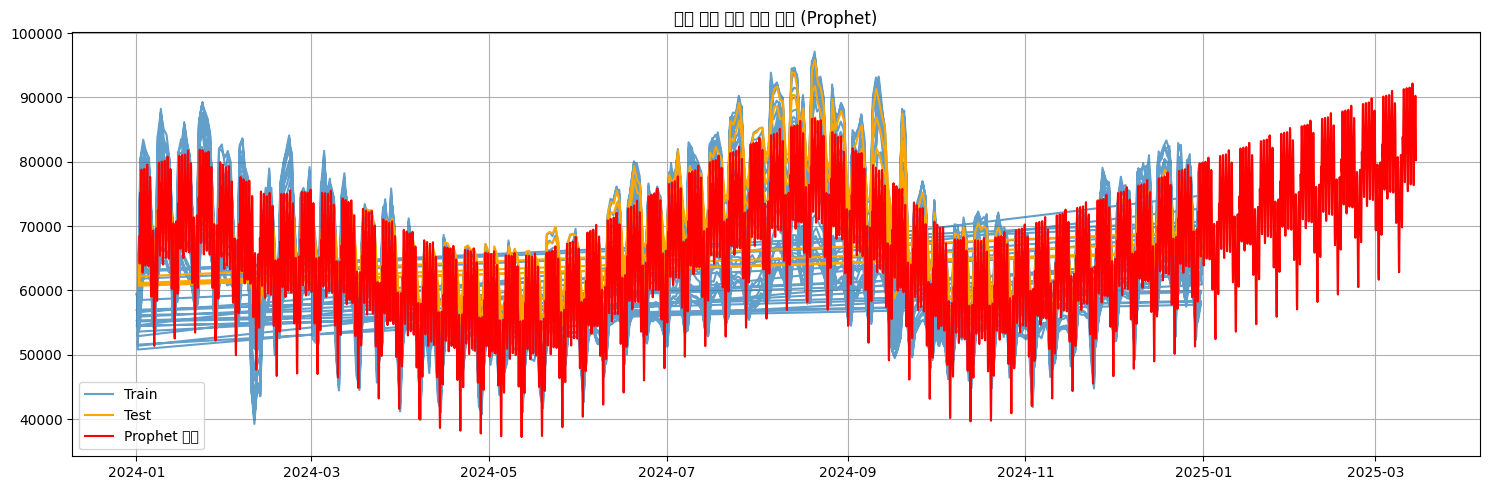

In [ ]:
# Prophet 설치
# !pip install prophet --quiet

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. 데이터 불러오기 및 전처리 (wide → long)
file_path = '/content/drive/MyDrive/ColabNotebooks/한국전력거래소_시간별 전국 전력수요량_20241231.csv'
df = pd.read_csv(file_path, encoding='cp949')

# melt로 세로형 변환
df_long = df.melt(id_vars='날짜', var_name='시간', value_name='수요량(MWh)')
df_long['시간'] = df_long['시간'].str.replace('시', '').astype(int)
df_long['일시'] = pd.to_datetime(df_long['날짜']) + pd.to_timedelta(df_long['시간'] - 1, unit='h')

# Prophet 형식으로 변환
df_prophet = df_long[['일시', '수요량(MWh)']].rename(columns={'일시': 'ds', '수요량(MWh)': 'y'})

# 2. train/test 분할 (80:20)
split_idx = int(len(df_prophet) * 0.8)
train_df = df_prophet.iloc[:split_idx]
test_df = df_prophet.iloc[split_idx:]

# 3. Prophet 모델 학습
model = Prophet(daily_seasonality=True)
model.fit(train_df)

# 4. 미래 프레임 생성 및 예측 수행
future = model.make_future_dataframe(periods=len(test_df), freq='h')  # 시간 단위
forecast = model.predict(future)

# 5. 예측값 병합 및 평가용 유효 구간 추출
forecast_result = forecast[['ds', 'yhat']]
merged = pd.merge(test_df, forecast_result, on='ds', how='left')
valid_rows = merged.dropna(subset=['y', 'yhat'])

# 6. 평가 지표 계산
mae = mean_absolute_error(valid_rows['y'], valid_rows['yhat'])
rmse = mean_squared_error(valid_rows['y'], valid_rows['yhat']) ** 0.5
print(f"✅ Prophet 예측 결과 → MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# 7. 시각화 (예측선은 Test 기간만 보여줌)
forecast_test_only = forecast[forecast['ds'] >= test_df['ds'].min()]

plt.figure(figsize=(15,5))
plt.plot(train_df['ds'], train_df['y'], label='Train', alpha=0.7)
plt.plot(test_df['ds'], test_df['y'], label='Test', color='orange')
plt.plot(forecast_test_only['ds'], forecast_test_only['yhat'], label='Prophet 예측', color='red')
plt.legend()
plt.title("시간 단위 전력 수요 예측 (Prophet)")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-27-18a397a14dfb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows['월'] = valid_rows['ds'].dt.to_period('M')  # 월 단위로 변환
<ipython-input-27-18a397a14dfb>:16: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-18a397a14dfb>:16: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-18a397a14dfb>:16: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-18a397a14dfb>:16: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-18a397a14dfb>:16: UserW

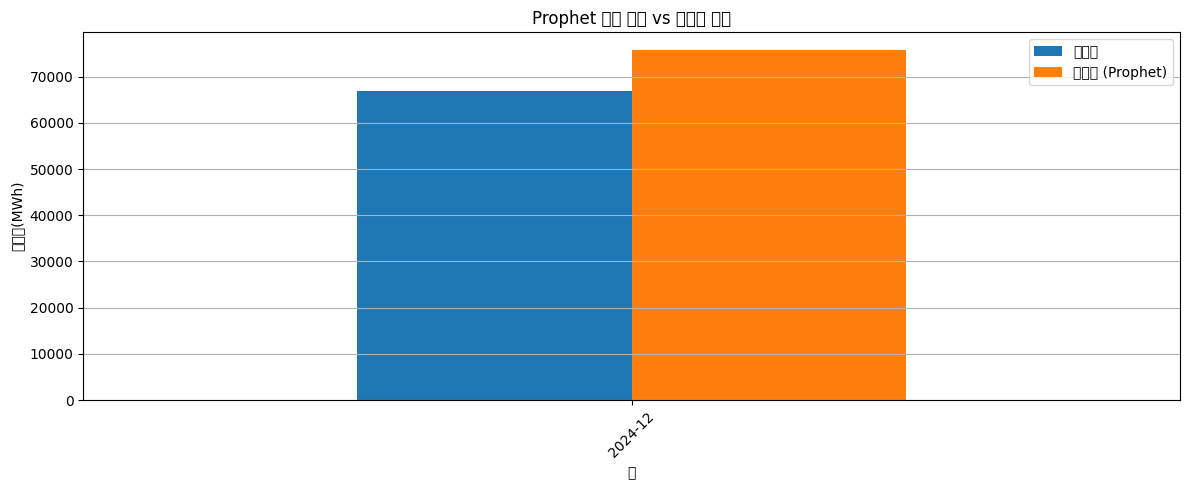

In [ ]:
# 1. 예측값 병합 (test_df + forecast → merged)
forecast_result = forecast[['ds', 'yhat']]
merged = pd.merge(test_df, forecast_result, on='ds', how='left')
valid_rows = merged.dropna(subset=['y', 'yhat'])

# 2. 월 단위로 그룹화해서 평균 수요량 비교
valid_rows['월'] = valid_rows['ds'].dt.to_period('M')  # 월 단위로 변환

monthly_comparison = valid_rows.groupby('월')[['y', 'yhat']].mean()
monthly_comparison = monthly_comparison.rename(columns={'y': '실제값', 'yhat': '예측값 (Prophet)'})

# 3. 시각화
monthly_comparison.plot(kind='bar', figsize=(12,5), title="Prophet 월별 예측 vs 실제값 비교", ylabel='수요량(MWh)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
